# Demografische Verteilung und Dunkelziffer
## \#WirVsVirus Hackathon 2020
Felix Weiler  
wei@biba.uni-bremen.de

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Altersverteilung bestaetigter Faelle und Todesfaelle
### Deutschland

RKI Daten nach Alter Gruppieren und ueber Landkreise aufsummieren

DatenQuelle: https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0  
20.03.2020

In [2]:
dp = pd.read_csv('data/CoV_data/RKI_COVID19.csv')

In [3]:
dp.head()

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis
0,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,M,2,0,154936,2020-03-18T00:00:00.000Z,15003
1,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,W,1,0,154937,2020-03-12T00:00:00.000Z,15003
2,15,Sachsen-Anhalt,SK Magdeburg,A35-A59,W,1,0,154938,2020-03-17T00:00:00.000Z,15003
3,15,Sachsen-Anhalt,SK Magdeburg,A60-A79,M,1,0,154939,2020-03-10T00:00:00.000Z,15003
4,15,Sachsen-Anhalt,SK Magdeburg,A60-A79,M,1,0,154940,2020-03-19T00:00:00.000Z,15003


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98295be898>,
      dtype=object)

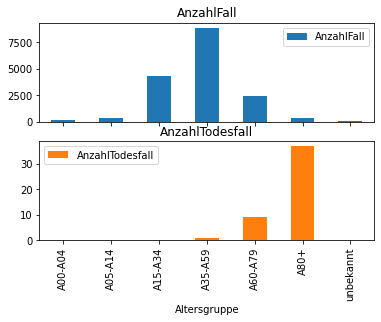

In [4]:
dp.groupby("Altersgruppe")[["AnzahlFall", "AnzahlTodesfall"]].sum().plot.bar(subplots=True)

In [5]:
data = dp.groupby("Altersgruppe")[["AnzahlFall", "AnzahlTodesfall"]].sum()
data["AnzahlFallPrct"] = data["AnzahlFall"] / data["AnzahlFall"].sum() * 100

In [6]:
index = [a.replace('A', '') for a in data.index.values]

Text(0, 0.5, 'Faelle Deutschland')

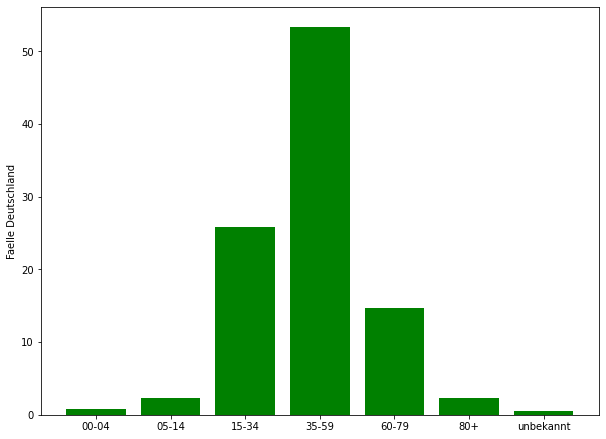

In [7]:
plt.figure(figsize=(10,7.5))
plt.bar(index, data["AnzahlFallPrct"], color='g')
plt.ylabel("Faelle Deutschland")

## Altersverteilung bestaetigter Faelle
### Korea

DatenQuelle: https://www.statista.com/statistics/1102730/south-korea-coronavirus-cases-by-age/  
20.03.2020

In [8]:
Korea = {
    '0-9'  :  1.12,
    '10-19':  5.22,
    '20-29': 27.33,
    '30-39': 10.32,
    '40-49': 13.79,
    '50-59': 19.13,
    '60-69': 12.70,
    '70-79':  6.56,
    '80+'  :  3.80}

Text(0, 0.5, 'Faelle Korea')

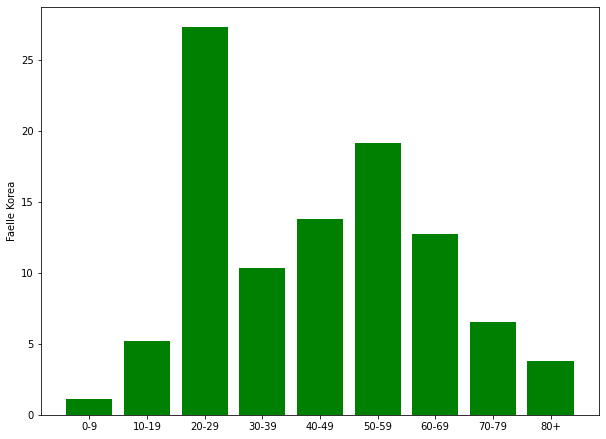

In [9]:
plt.figure(figsize=(10,7.5))
plt.bar(list(Korea.keys()), list(Korea.values()), color='g')
plt.ylabel('Faelle Korea')

## Altersverteilung bestaetigter Faelle
### Italien

Quelle: https://www.epicentro.iss.it/coronavirus/bollettino/Bolletino-sorveglianza-integrata-COVID-19_19-marzo-2020_appendix.pdf  
20.03.2020

preprocessing: 
``` bash
pdftotext Bolletino\*.pdf
```

In [11]:
Italien = dict()
overall_sum = 0

with open('data/CoV_data/Bolletino-sorveglianza-integrata-COVID-19_19-marzo-2020_appendix.txt') as source:
    for line in source:
        if line.startswith("Fascia d"):
            
            district_sum = 0
            
            for n in range(11):
                key = source.readline()
                key = key.strip('\n')
                
                value = source.readline()
                value = float(value.split()[0].strip('%()'))
                    
                district_sum += value
                    
                if not key in Italien:
                    Italien[key] = value
                else:
                    Italien[key] += value
                
            overall_sum += district_sum
                
        
for key in Italien.keys():
    Italien[key] *= 1 / overall_sum * 100
                
print(overall_sum)

35747.0


Text(0, 0.5, 'Faelle Italien')

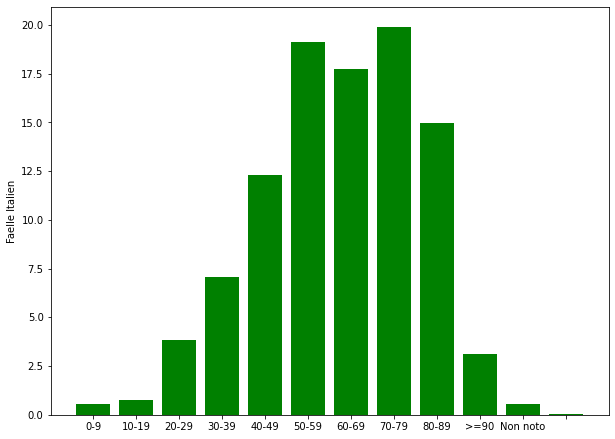

In [12]:
plt.figure(figsize=(10,7.5))
plt.bar(list(Italien.keys()), list(Italien.values()), color='g')
plt.ylabel('Faelle Italien')

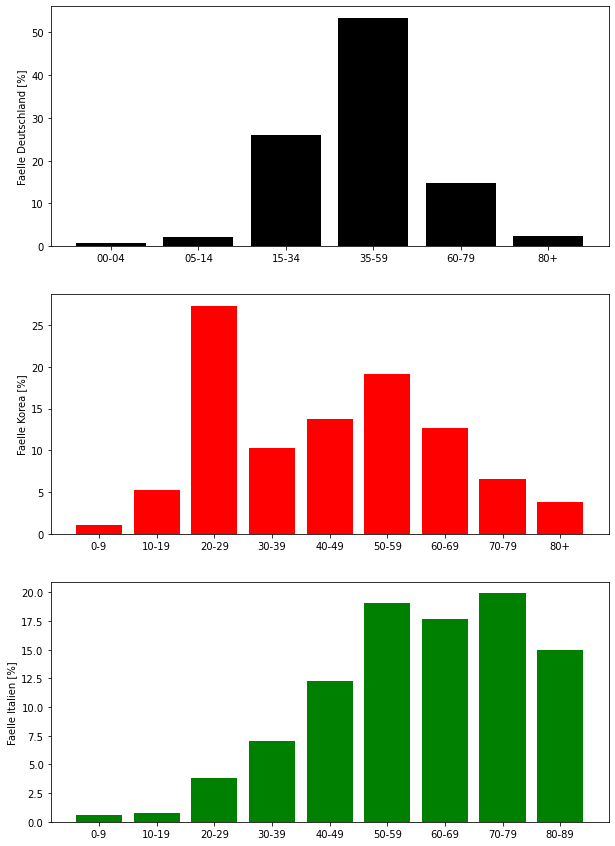

In [13]:
plt.figure(figsize=(10, 15))
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)

ax1.bar(index[:-1], data.iloc[:-1, 2].values, color='k')
ax1.set_ylabel("Faelle Deutschland [%]")
ax1.set_xticklabels(index)
ax2.bar(list(Korea.keys()), list(Korea.values()), color='r')
ax2.set_ylabel('Faelle Korea [%]')
ax3.bar(np.asarray(list(Italien.keys()))[:-3], np.asarray(list(Italien.values()))[:-3], color='g')
ax3.set_ylabel('Faelle Italien [%]')
plt.savefig('ger_kor_it_vergleich.png')